In [30]:
%matplotlib inline

## Software Comparison Project with NIDM-Results

This notebook demonstates how to reproduce the results presented in the Software Comparison Project publication using NIDM-Results packs available at [NeuroVault (2982)](https://neurovault.org/collections/2982/). We give visual comparisons between axial slices of the excursion set images and F-statistics for each software packages, as well as quantitative comparisons with Euler characteristics, Bland-Altman plots and Sørensen–Dice coefficients.

In [31]:
import os
from subprocess import check_call
import zipfile
from nilearn import plotting

### Download the NIDM-Results packs from NeuroVault

 - Query NeuroVault's API to retreive all NIDM packs in collection 2982
 - Download and save the packs in sub-folder `input/ds120/` 

In [32]:
from lib import download_data
reload(download_data)
download_data.download_data('2982', 'ds120')

https://neurovault.org/collections/2982/spm_0001.nidm.zip already downloaded at ./input/ds120/spm_0001.nidm.zip
https://neurovault.org/collections/2982/spm_0001.nidm.zip already copied at /Users/maullz/Desktop/Software_Comparison/figures/input/ds120/afni_euler_chars.csv
https://neurovault.org/collections/2982/spm_0001.nidm.zip already copied at /Users/maullz/Desktop/Software_Comparison/figures/input/ds120/spm_euler_chars.csv
http://neurovault.org/media/images/2982/mask.nii.gz already downloaded at /Users/maullz/Desktop/Software_Comparison/figures/input/ds120/afni_mask.nii.gz
http://neurovault.org/media/images/2982/Positive_clustered_f_stat.nii.gz already downloaded at /Users/maullz/Desktop/Software_Comparison/figures/input/ds120/afni_exc_set_pos.nii.gz
http://neurovault.org/media/images/2982/Group_f_stat_masked.nii.gz already downloaded at /Users/maullz/Desktop/Software_Comparison/figures/input/ds120/afni_stat.nii.gz


In [33]:
import zipfile
import shutil
import pandas as pd

study = 'ds120'

# *** SPM group activations
spm_pack = open('./input/' + study + '/spm_0001.nidm.zip', 'rb')
z = zipfile.ZipFile(spm_pack)
z.extract('ExcursionSet.nii.gz', './input/' + study + '/')
z.extract('Mask.nii.gz', './input/' + study + '/')
z.extract('FStatistic.nii.gz', './input/' + study + '/')

# Thresholded statistics
spm_exc_set_file = './input/' + study + '/spm_exc_set.nii.gz'
shutil.move('./input/' + study + '/ExcursionSet.nii.gz', spm_exc_set_file)

# Unthresholded statistics
spm_stat_file = './input/' + study + '/spm_stat.nii.gz'
shutil.move('./input/' + study + '/FStatistic.nii.gz', spm_stat_file)

# Analysis mask
spm_mask_file = './input/' + study + '/spm_mask.nii.gz'
shutil.move('./input/' + study + '/Mask.nii.gz', spm_mask_file)

# *** AFNI group activations and deactivations
afni_mask_file = './input/' + study + '/afni_mask.nii.gz'
afni_exc_set_file = './input/' + study + '/afni_exc_set_pos.nii.gz'
afni_stat_file = './input/' + study + '/afni_stat.nii.gz'

exc_sets = dict()
exc_sets["spm"] = (spm_mask_file, spm_exc_set_file, spm_stat_file)
exc_sets["afni"] = (afni_mask_file, afni_exc_set_file, afni_stat_file)

# Euler Characteristics
afni_euler_chars = pd.read_csv('./input/' + study + '/afni_euler_chars.csv', header=None, names=['Threshold','AFNI EC'])
spm_euler_chars = pd.read_csv('./input/' + study + '/spm_euler_chars.csv', usecols=[1], header=None, names=['SPM EC'])
euler_chars = pd.concat([afni_euler_chars, spm_euler_chars], axis=1)

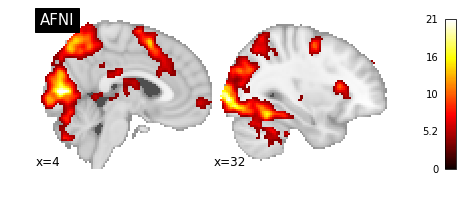

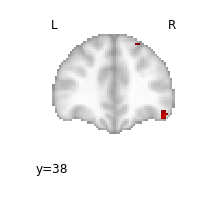

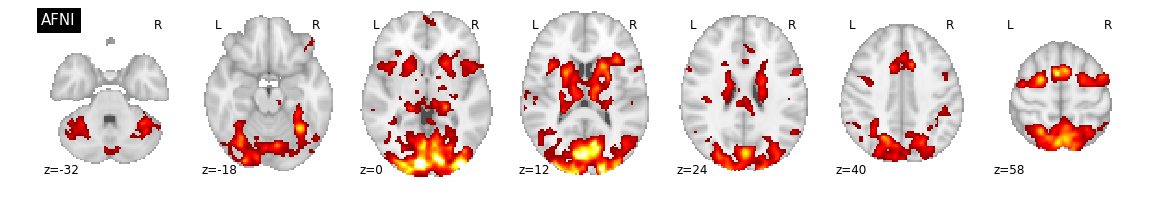

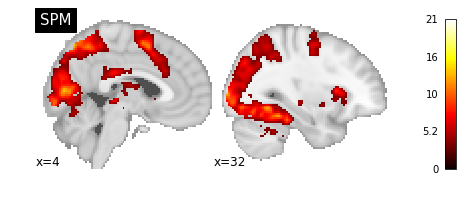

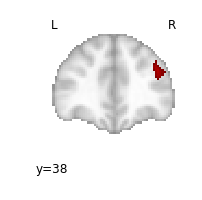

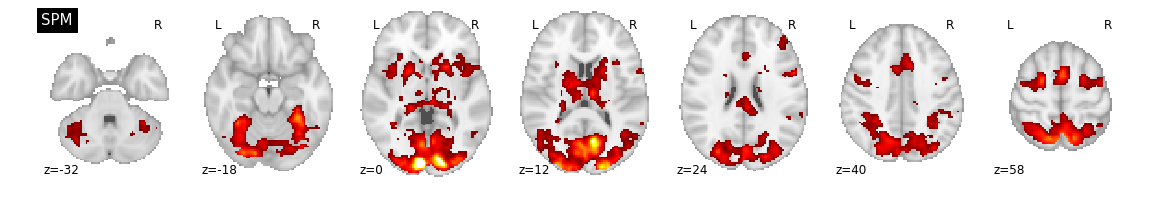

In [34]:
from lib import plot_excursion_sets
# Determine the scale of the activation colorbar
max_activation=21
# Determine the coordinates of the x, y, and z axial slices to be displayed
x_coords=[4, 32]
y_coords=[38]
z_coords=[-32, -18, 0, 12, 24, 40, 58]

reload(plot_excursion_sets)
plot_excursion_sets.plot_excursion_sets(exc_sets, max_activation, x_coords, y_coords, z_coords)

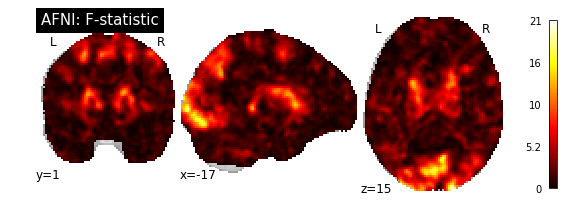

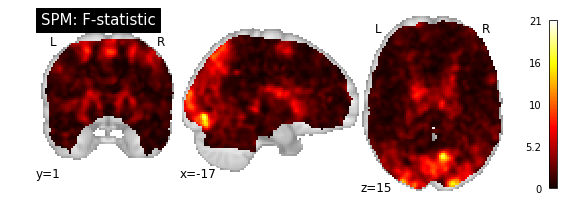

In [35]:
from lib import plot_stat_images
max_activation=21
reload(plot_stat_images)
plot_stat_images.plot_stat_images(afni_stat_file, spm_stat_file, max_activation, [-17, 1, 15], 'F-statistic')

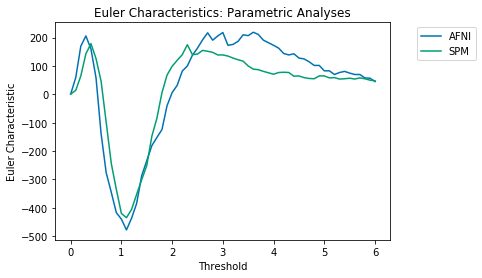

In [36]:
from lib import euler_characteristics
reload(euler_characteristics)
euler_characteristics.euler_characteristics(euler_chars, 'Parametric Analyses')

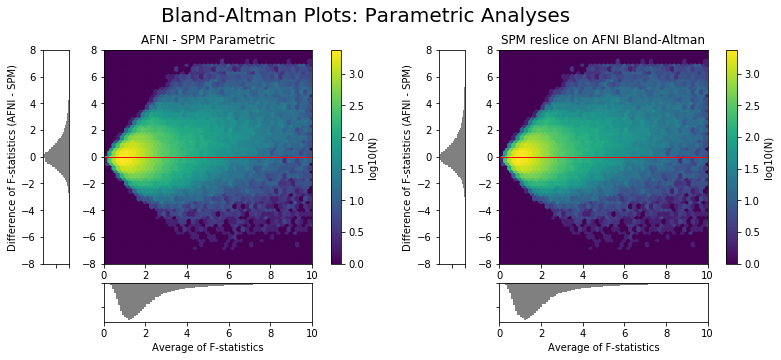

In [37]:
from lib import bland_altman
reload(bland_altman)
bland_altman.bland_altman('Bland-Altman Plots: Parametric Analyses', afni_stat_file, spm_stat_file,
             'AFNI - SPM Parametric', study=study)

AFNI/SPM positive activation dice coefficient = 0.873388
SPM/AFNI positive activation dice coefficient = 0.873388


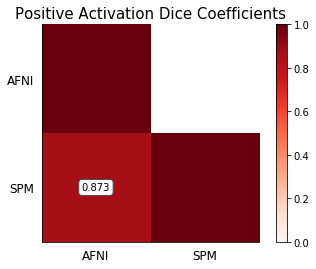

In [38]:
from lib import dice
reload(dice)
dice.dice(afni_exc_set_file, spm_exc_set_file, study=study,
         afni_stat_file=afni_stat_file, spm_stat_file=spm_stat_file)